In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
#add data into dataframes
neighbourhood_profile = Path("Resources/neighbourhood-profiles-2021-158-model.xlsx")
neighbourhood_profile_df = pd.read_excel(neighbourhood_profile, sheet_name="hd2021_census_profile")

In [3]:
#check for null values
null_nprofile = neighbourhood_profile_df.isnull()
null_per_column_nprofile = null_nprofile.sum()
non_null_columns = null_per_column_nprofile[null_per_column_nprofile > 0]
print(non_null_columns)

Series([], dtype: int64)


In [4]:
#check the number of neighbourhoods
num_locations = neighbourhood_profile_df.shape[1] - 1 #-1 for first column that are not neighbourhood data
print(num_locations)
#neighbourhood numbers go up to 174, but there is 158 neighbourhoods according to toronto.ca. 

158


In [5]:
#add a clean df and have first column as row headers.
nprofile_clean_df = neighbourhood_profile_df.copy()
nprofile_clean_df.set_index(nprofile_clean_df.columns[0], inplace=True)
nprofile_clean_df.head()


,West Humber-Clairville,Mount Olive-Silverstone-Jamestown,Thistletown-Beaumond Heights,Rexdale-Kipling,Elms-Old Rexdale,Kingsview Village-The Westway,Willowridge-Martingrove-Richview,Humber Heights-Westmount,Edenbridge-Humber Valley,Princess-Rosethorn,...,Harbourfront-CityPlace,St Lawrence-East Bayfront-The Islands,Church-Wellesley,Downtown Yonge East,Bay-Cloverhill,Yonge-Bay Corridor,Junction-Wallace Emerson,Dovercourt Village,North Toronto,South Eglinton-Davisville
Neighbourhood Name,,,,,,,,,,,,,,,,,,,,,
Neighbourhood Number,1,2,3,4,5,6,7,8,9,10,...,165,166,167,168,169,170,171,172,173,174
TSNS 2020 Designation,Not an NIA or Emerging Neighbourhood,Neighbourhood Improvement Area,Neighbourhood Improvement Area,Not an NIA or Emerging Neighbourhood,Neighbourhood Improvement Area,Neighbourhood Improvement Area,Not an NIA or Emerging Neighbourhood,Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,...,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood,Not an NIA or Emerging Neighbourhood
Total - Age groups of the population - 25% sample data,33300,31345,9850,10375,9355,22005,22445,10005,15190,11170,...,28135,31285,22320,17700,16670,12645,23180,12380,15885,22735
0 to 14 years,4295,5690,1495,1575,1610,3915,3500,1370,2070,1750,...,2065,2285,895,1055,745,970,3075,1365,1315,2190
0 to 4 years,1460,1650,505,505,440,1245,1065,395,520,545,...,1030,1045,495,480,370,500,1135,445,535,910


In [6]:
#row of data I am looking for. 2020 because budget for 2021 is based on 2020 data.
data_row = ["    Median total income in 2020  among recipients ($)",
           "    Average total income in 2020 among recipients ($)"
           ]

In [7]:
nprofile_data_df = nprofile_clean_df.loc[data_row]
nprofile_data_df.head()

,West Humber-Clairville,Mount Olive-Silverstone-Jamestown,Thistletown-Beaumond Heights,Rexdale-Kipling,Elms-Old Rexdale,Kingsview Village-The Westway,Willowridge-Martingrove-Richview,Humber Heights-Westmount,Edenbridge-Humber Valley,Princess-Rosethorn,...,Harbourfront-CityPlace,St Lawrence-East Bayfront-The Islands,Church-Wellesley,Downtown Yonge East,Bay-Cloverhill,Yonge-Bay Corridor,Junction-Wallace Emerson,Dovercourt Village,North Toronto,South Eglinton-Davisville
Neighbourhood Name,,,,,,,,,,,,,,,,,,,,,
Median total income in 2020 among recipients ($),33600,29600,32800,33600,34400,34400,40800,40400,48400,58800,...,58800,58000,42800,45200,39600,44000,41200,38000,46000,52400
Average total income in 2020 among recipients ($),40560,35000,41520,42040,41240,44880,53750,60900,98200,101900,...,73100,79700,56700,66700,66300,68200,54350,55850,58100,69000


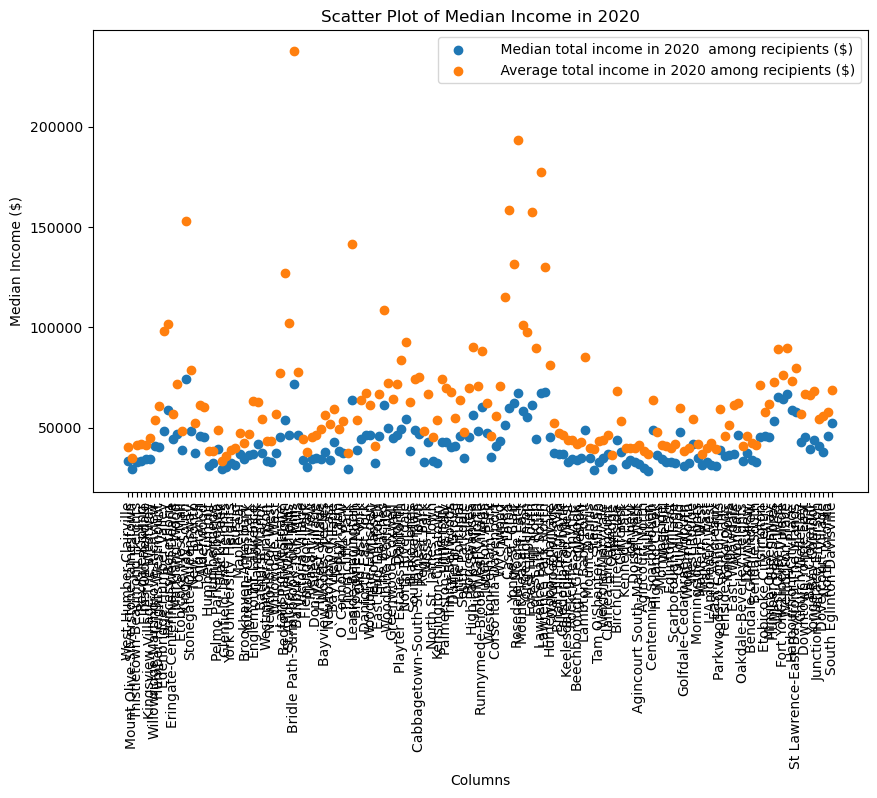

In [20]:
#scatter graph to show data 


#transoses to have column headers as indices
nprofile_data_df_transposed = nprofile_data_df.transpose()

plt.figure(figsize=(10, 6))
plt.scatter(nprofile_data_df_transposed.index, nprofile_data_df_transposed.iloc[:, 0], label=data_row[0])
plt.scatter(nprofile_data_df_transposed.index, nprofile_data_df_transposed.iloc[:, 1], label=data_row[1])
plt.title('Scatter Plot of Median Income in 2020')
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.ylabel('Median Income ($)')
plt.legend()
plt.show()